In [1]:
import numpy as np
import pandas as pd

<H1> Exploratory Analysis</h1>


In [3]:
crop=pd.read_csv("Crop_recommendation.csv")
#type(crop)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info() # for all features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.describe() #statistics of only numerical features

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<h1> Data Visualization</h1>

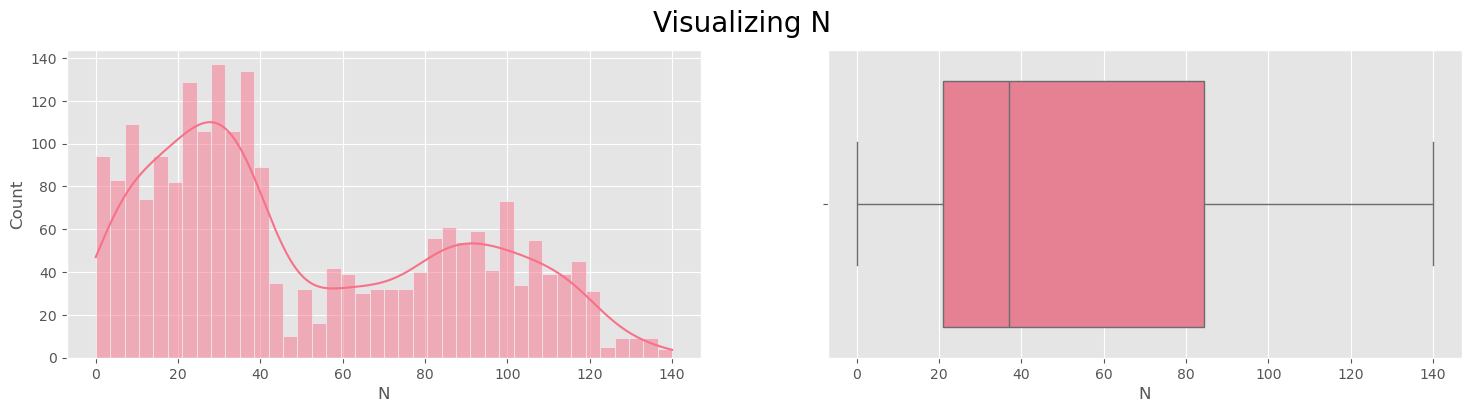

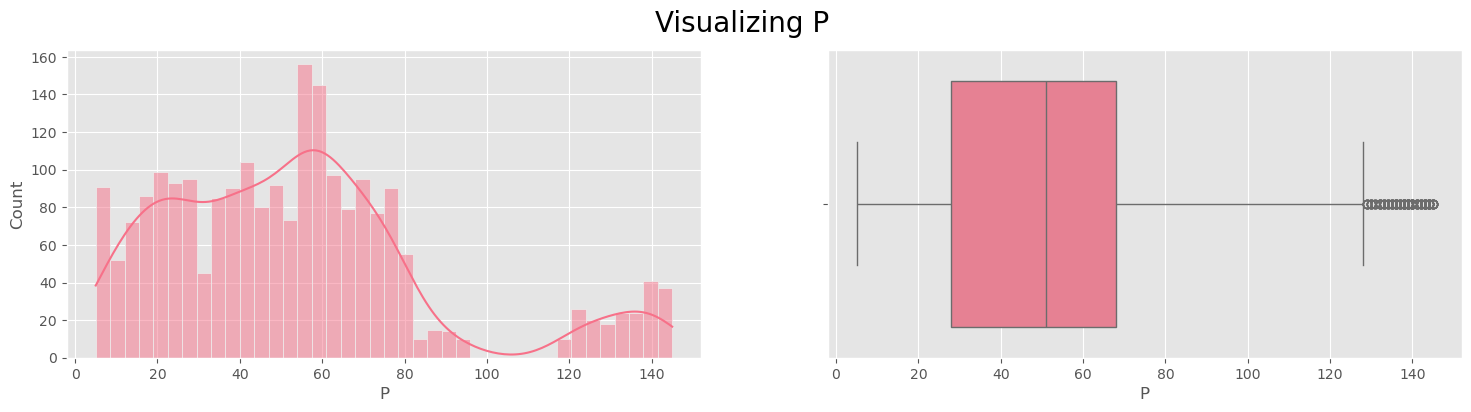

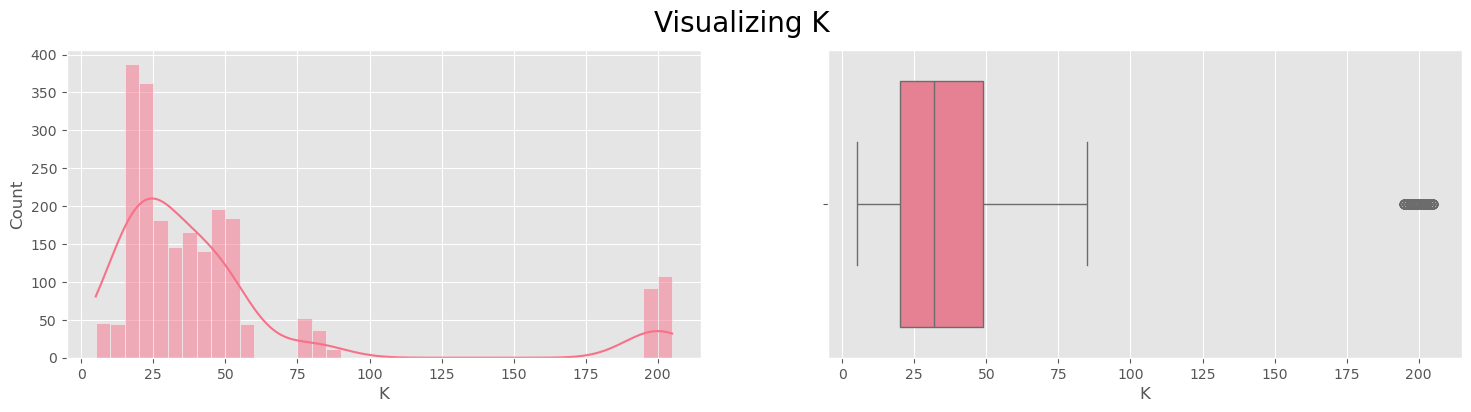

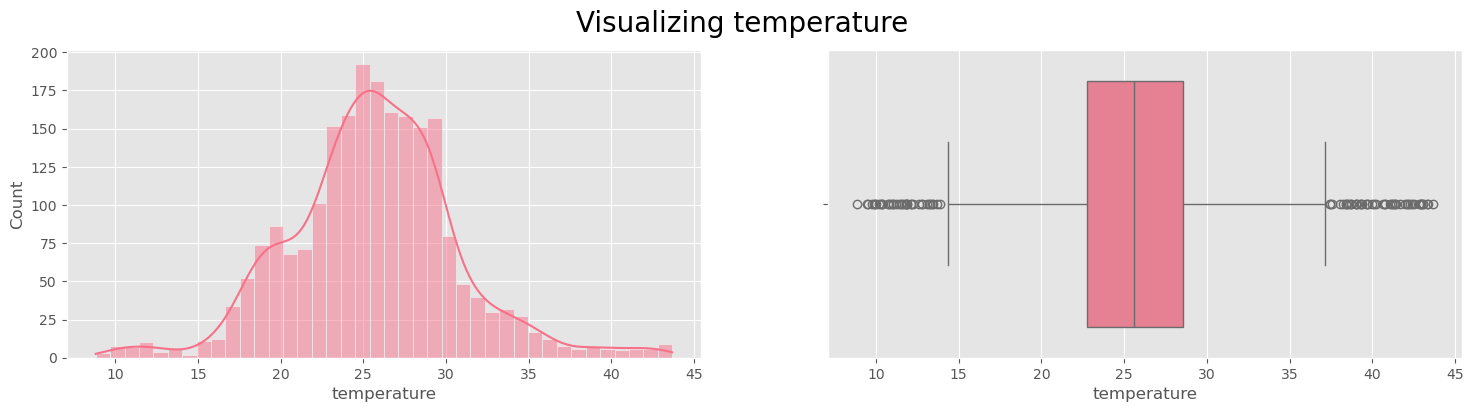

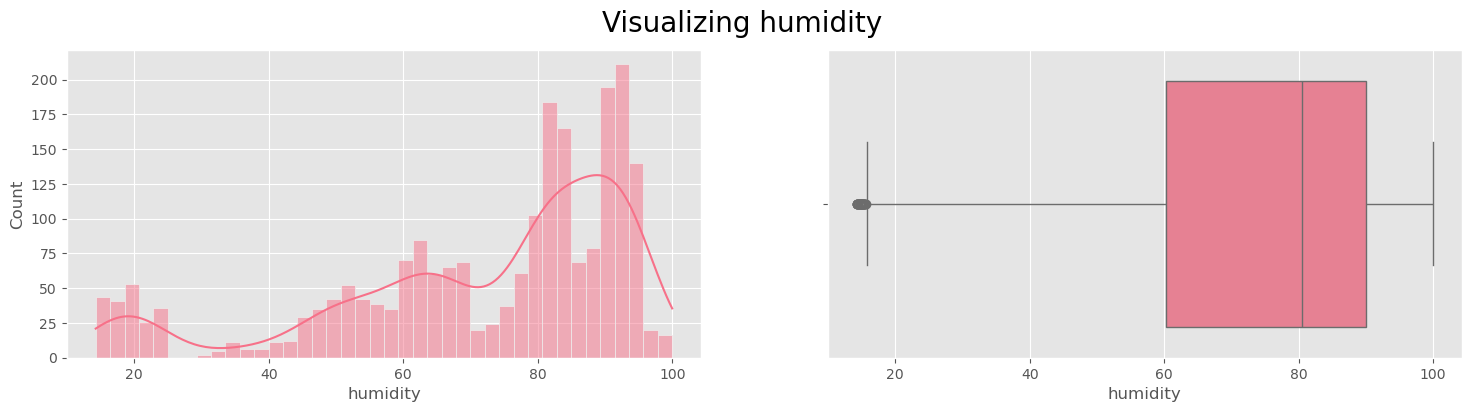

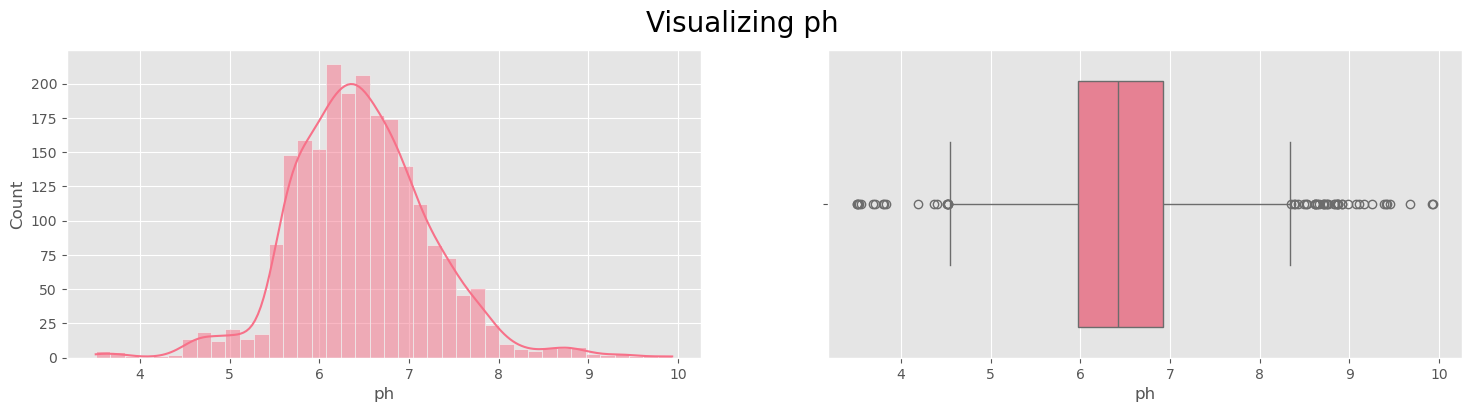

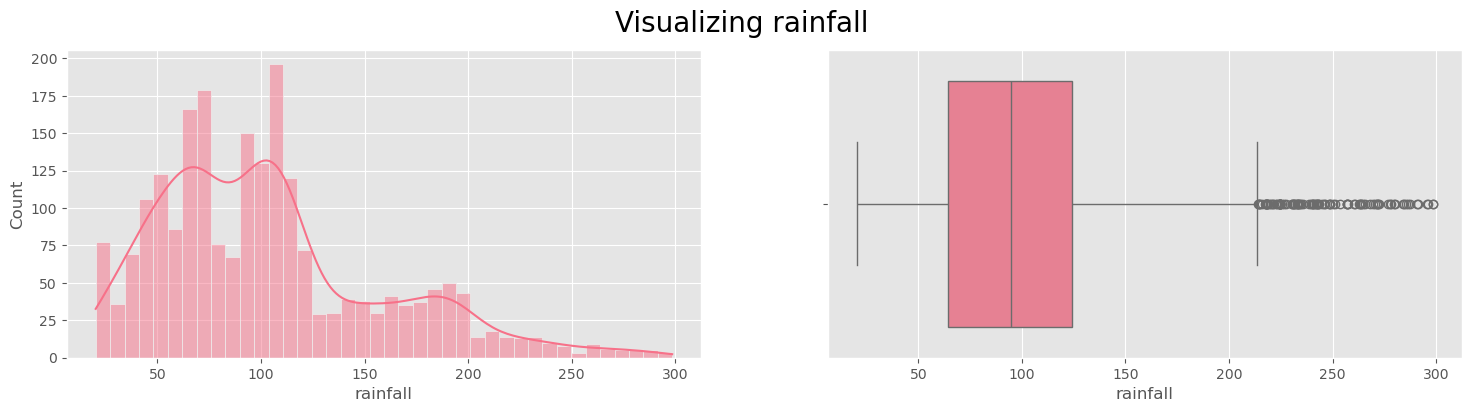

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_palette("husl")
for i in crop.columns[:-1]:
    fig,ax=plt.subplots(1,2,figsize=(18,4))
    sns.histplot(data=crop,x=i,kde=True,bins=40,ax=ax[0])
    sns.boxplot(data=crop,x=i,ax=ax[1])
    plt.suptitle(f'Visualizing {i}',size=20)

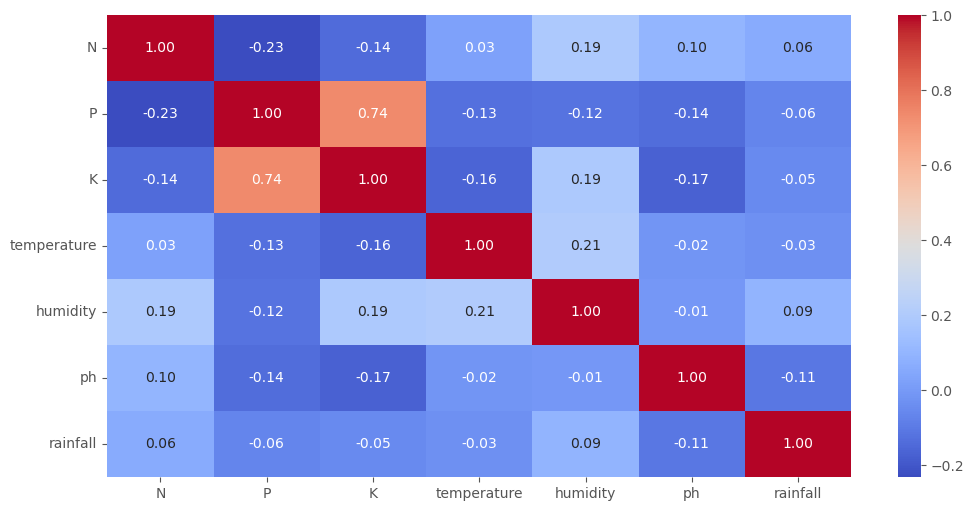

In [8]:
numeric_crop = crop.select_dtypes(include=['float64', 'int64'])
figure = plt.figure(figsize=(12, 6))
sns.heatmap(numeric_crop.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<h1> Data Pre-processing <h1>

<h4> 1. Handling Missing Values</h4>

In [9]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [10]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop.duplicated().sum()

0

<h4>2. Label Encoding</h4>

In [18]:
#encoding
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [19]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [20]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [21]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [22]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [23]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

<h4> 3. Train Test Split</h4>

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


<h4> 4. Scaling and Standardization</h4>

In [34]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train


array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

<h1> Applying Different Models </h1>

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Logistic Regression with accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Logistic Regression with accuracy: 0.9295454545454546
Precision: 0.9414068512561335
Recall: 0.9295454545454546
F1-Score: 0.9275323318484936


In [65]:
from sklearn.svm import SVC

# Initialize and train model
model = SVC()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Support Vector Machine with accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Support Vector Machine with accuracy: 0.9681818181818181
Precision: 0.9715171192443919
Recall: 0.9681818181818181
F1-Score: 0.9680271341017991


In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"K-Nearest Neighbors with accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

K-Nearest Neighbors with accuracy: 0.9590909090909091
Precision: 0.9653897981006235
Recall: 0.9590909090909091
F1-Score: 0.9590011070163019


In [67]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1e-2)
model.fit(X_train_scaled, y_train)
ypred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Gaussian Naive Bayes with variance smoothing and accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Gaussian Naive Bayes with variance smoothing and accuracy: 0.9840909090909091
Recall: 0.9840909090909091
F1-Score: 0.9845069852234487


In [68]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Decision Tree with accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Decision Tree with accuracy: 0.9863636363636363
Precision: 0.9868055555555556
Recall: 0.9863636363636363
F1-Score: 0.9863152866630287


In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Random Forest with accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Random Forest with accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1-Score: 0.9931754816901672


In [70]:
from sklearn.ensemble import BaggingClassifier

# Initialize and train model
model = BaggingClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Bagging Classifier with accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Bagging Classifier with accuracy: 0.990909090909091
Precision: 0.9911616161616161
Recall: 0.990909090909091
F1-Score: 0.9909147163309975


<h1> Final Code with Random Forest Classifier</h1>

In [83]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}

def suggest_crop(features):
    features = np.array(features).reshape(1, -1)
    predicted_crop_num = rf.predict(features)[0]
    predicted_crop_name = crop_dict.get(predicted_crop_num, "Unknown Crop")
    return predicted_crop_name

# Example valid input (corresponding to [N, P, K, temperature, humidity, ph, rainfall])
example_input_1 = [100, 30, 30, 25, 60, 6, 170]
example_input_2 = [30,50,40,30.50,50.0,30,40]

predicted_crop_name_1 = suggest_crop(example_input_1)
predicted_crop_name_2 = suggest_crop(example_input_2)
print(f"The predicted crop for the first set of input features is: {predicted_crop_name_1}")
print(f"The predicted crop for the second set of input features is: {predicted_crop_name_2}")

The predicted crop for the first set of input features is: Coffee
The predicted crop for the second set of input features is: Mothbeans
